In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [26]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.2, 20.0, 100)
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8
 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4 19.6
 19.8 20. ]


In [27]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [28]:
alpha0 = 0.5
d0 = 2.0

In [29]:
u_test = np.zeros((num_frames, k_vals.shape[0]))
for i in range(num_frames):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)
# print(np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)[0])
u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)

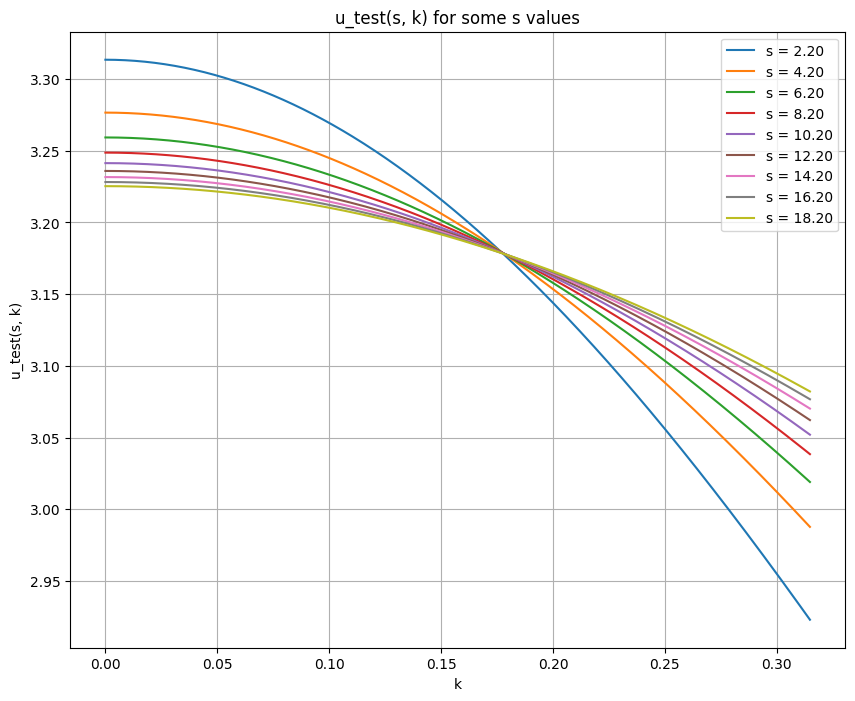

In [30]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [31]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 2.20 : 0.0016419124886452704


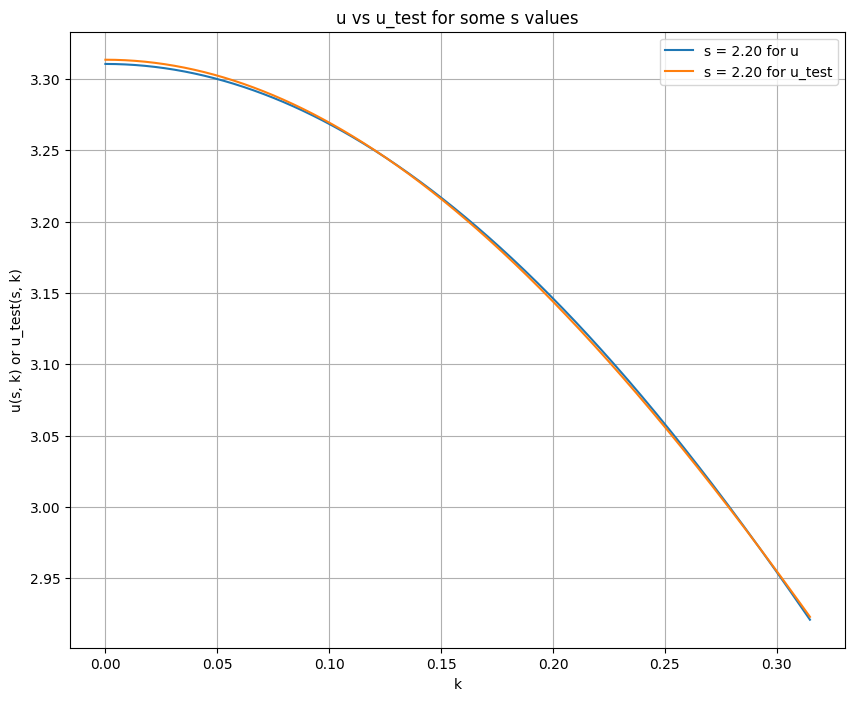

average difference for s = 4.20 : 0.0025661732489735663


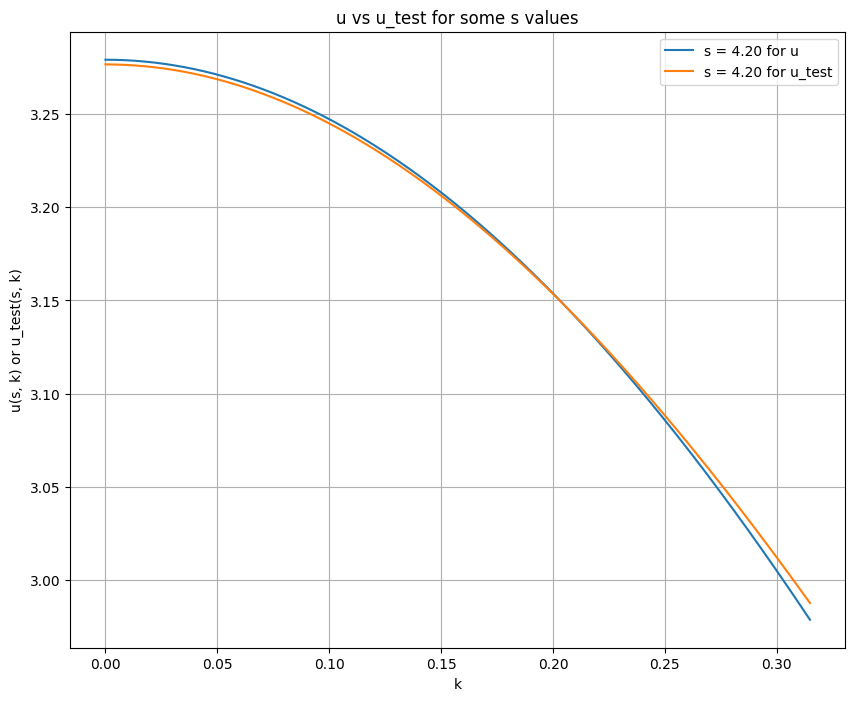

average difference for s = 6.20 : 0.004737383632114648


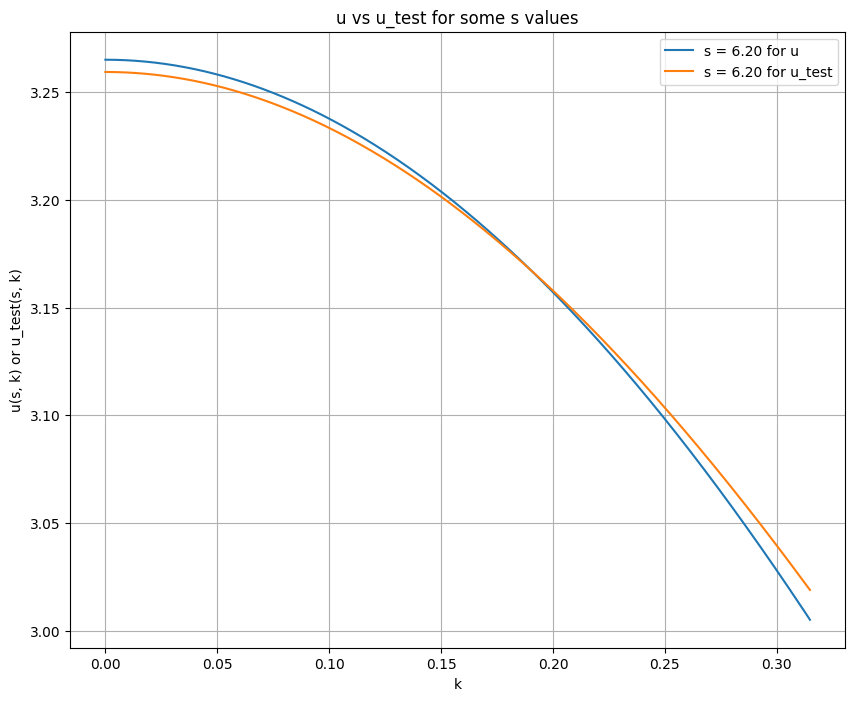

average difference for s = 8.20 : 0.0062837482943396885


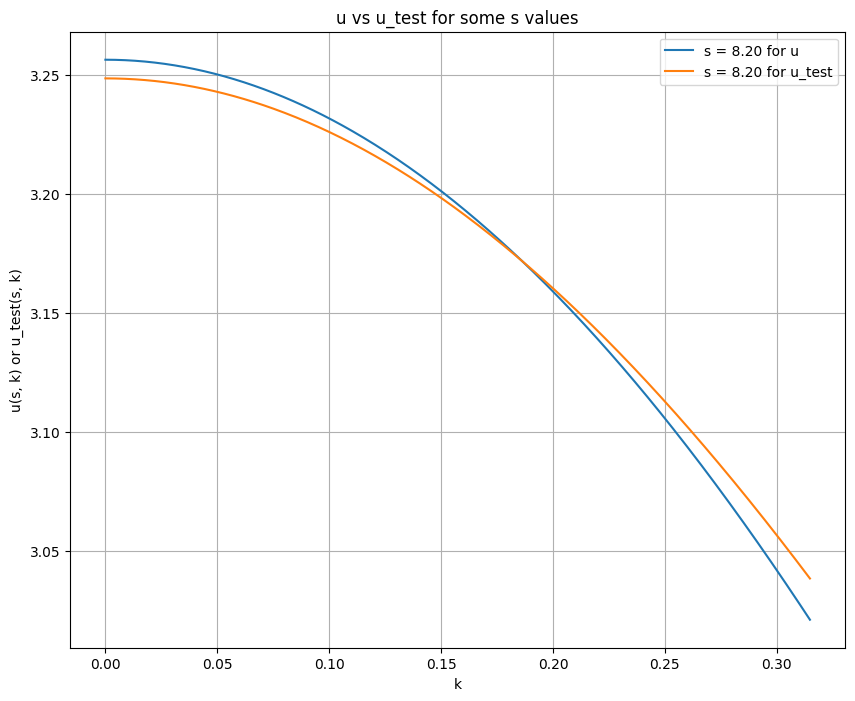

average difference for s = 10.20 : 0.007448697163644378


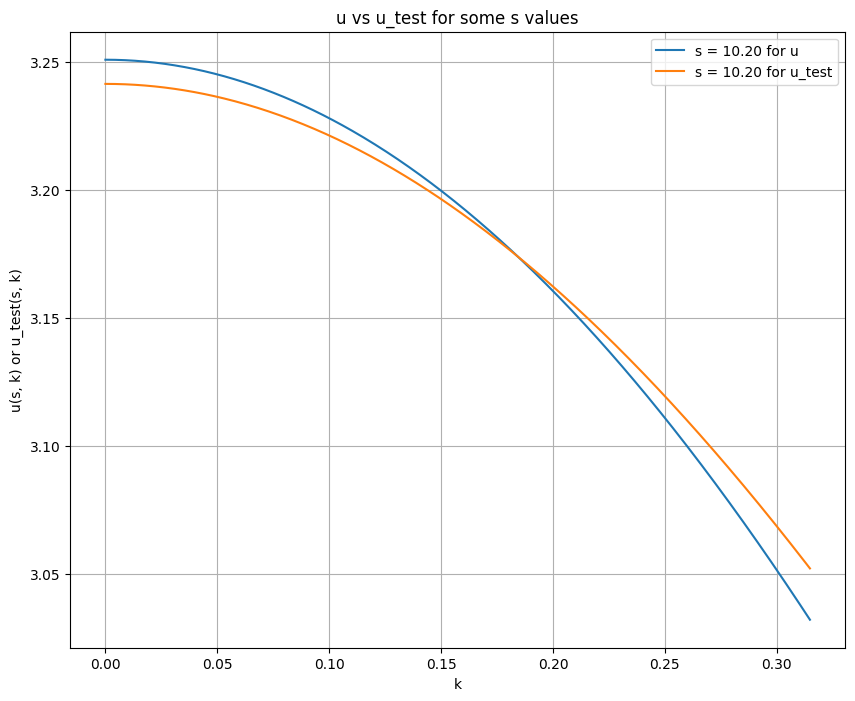

average difference for s = 12.20 : 0.008366247340322165


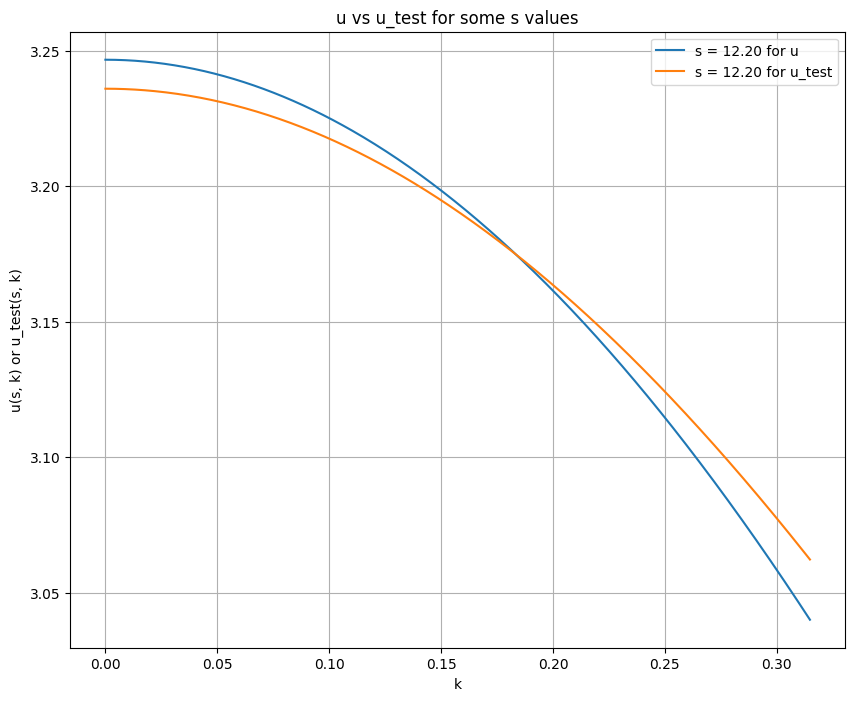

average difference for s = 14.20 : 0.00911299875671004


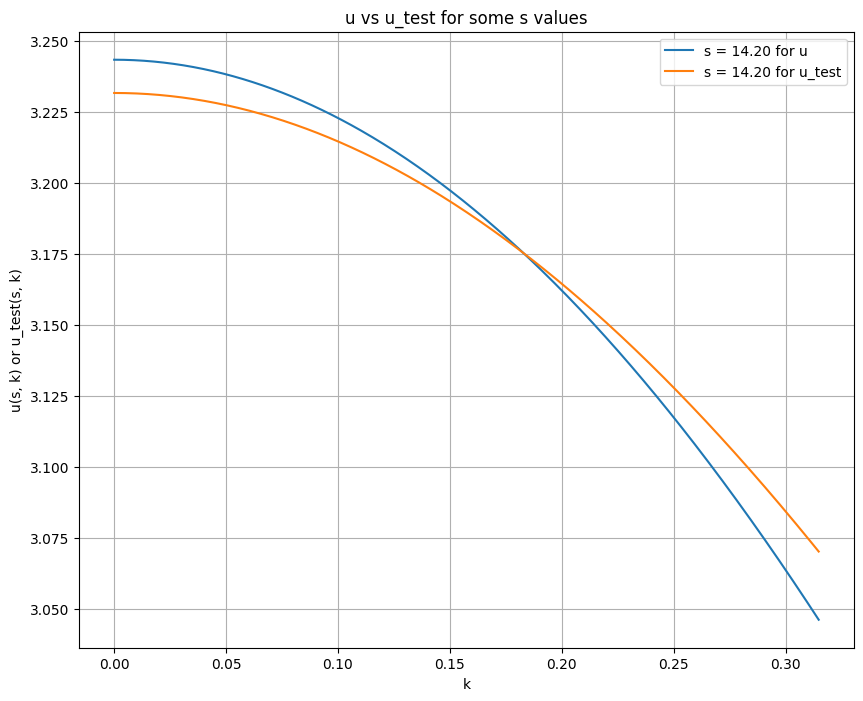

average difference for s = 16.20 : 0.009736565887783842


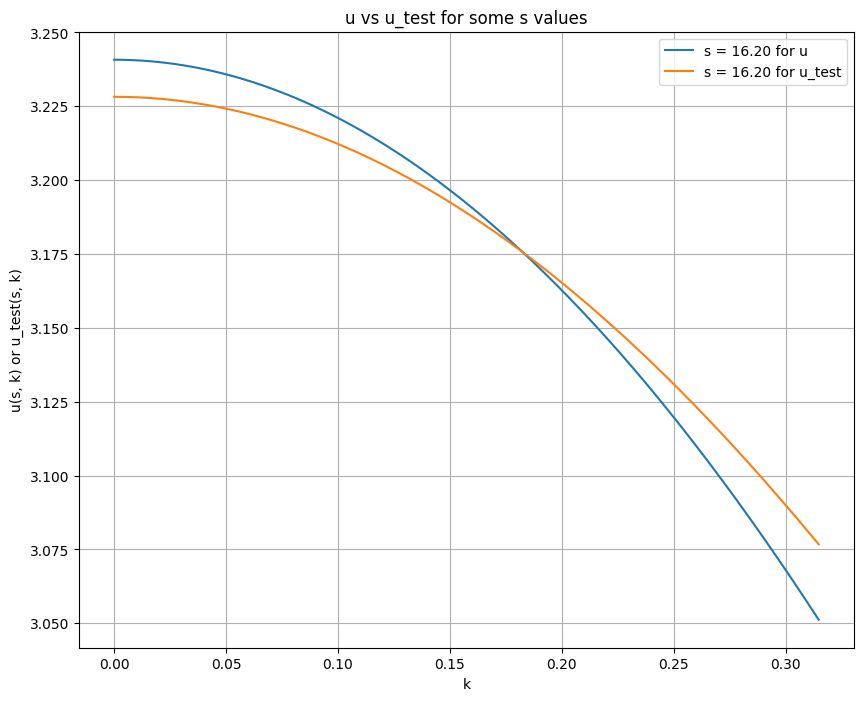

average difference for s = 18.20 : 0.010268464729168153


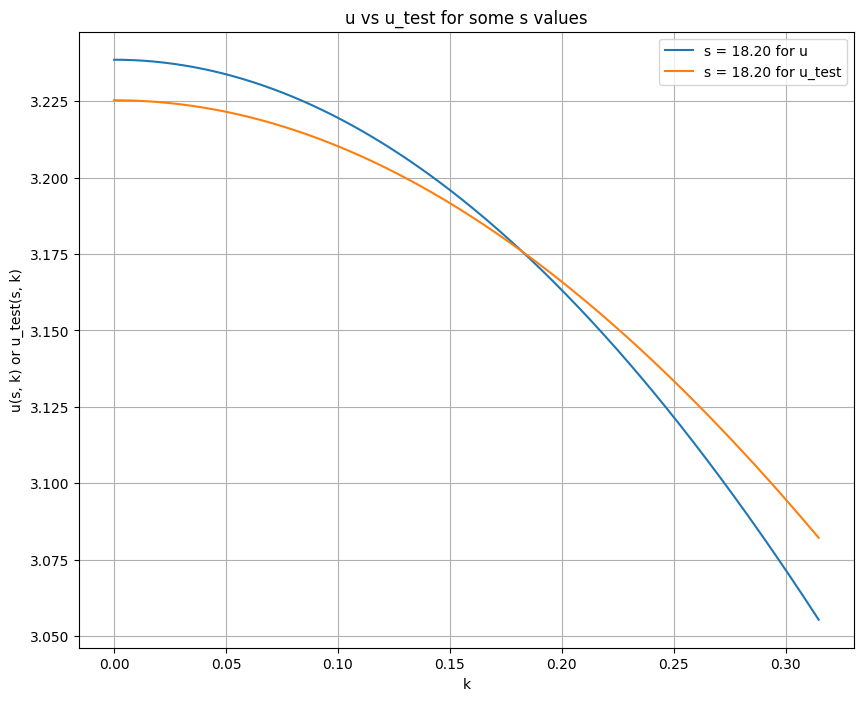

In [32]:
# compare u and u_test

for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()